# Roots and integrals

Compare the accuracies (how many digits are correct) and efficiencies (how many steps does it take to reach a given accuracy) of any two quadrature algorithms on the definite integral:

$$
\int_0^1 \exp(3x)dx
$$

And any two root-finding algorithms on the two functions

$$
y(x) = \tan(x)
$$

and

$$
y(x) = \tanh(x)
$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rootfinding import *
from integrals import *

## Integrate $\exp(3x)$

True value is 

$$
\int_0^1 \exp(3x) dx = \frac{1}{3}\left(\exp(3)-1\right) = 6.361845641062556
$$

### Plot the function

In [2]:
x0 = 0
x1 = 1
n = 101
xvals = np.linspace(x0,x1,n)
fvals = np.exp( 3* xvals )
ana_der = 3 * fvals

True value of integral = 6.3618


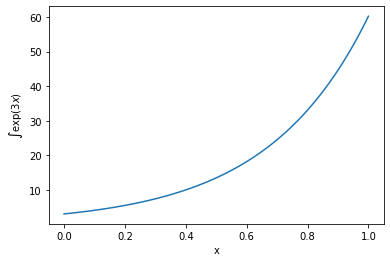

In [3]:
plt.plot(xvals,ana_der)
plt.xlabel("x")
plt.ylabel("$\int \exp(3x)$")

I = (np.exp(3) - 1 ) / 3.
print("True value of integral = %6.4f" % (I))

### Compute the integrals

In [4]:
I1 = simpson(lambda x : np.exp(3*x), x0, x1, n)
I2 = trapezoid(lambda x : np.exp(3*x), x0, x1, n)
I3 = adaptive_trapezoid(lambda x : np.exp(3*x), x0, x1, 1e-6, output=True)

N = 2,  Integral = 10.542768461593834
N = 2.0,  Integral = 7.512228765965949
N = 4.0,  Integral = 6.657298346225774
N = 8.0,  Integral = 6.436224369354567
N = 16.0,  Integral = 6.380472949015574
N = 32.0,  Integral = 6.366504513566256
N = 64.0,  Integral = 6.3630104871335105
N = 128.0,  Integral = 6.3621368605784285
N = 256.0,  Integral = 6.361918446441433
N = 512.0,  Integral = 6.361863842438524
N = 1024.0,  Integral = 6.3618501914085
N = 2048.0,  Integral = 6.361846778649171
N = 4096.0,  Integral = 6.361845925459217


### Compare accuracies

In [5]:
print("Accuracies: ")
print( "True integral      = %6.6e" % (I) )
print( "Simpson's rule     = %6.6e, err = %6.6e " % ( I1, (I1 - I)/I )  )
print( "Trapezoid rule     = %6.6e, err = %6.6e " % ( I2, (I2 - I)/I )  )
print( "Adaptive trap rule = %6.6e, err = %6.6e " % ( I2, (I2 - I)/I )  )



Accuracies: 
True integral      = 6.361846e+00
Simpson's rule     = 6.167843e+00, err = -3.049464e-02 
Trapezoid rule     = 6.362313e+00, err = 7.352112e-05 
Adaptive trap rule = 6.362313e+00, err = 7.352112e-05 


## Find the roots of $\tan(x)$ and $\tanh(x)$

Be careful! Both of these have roots at $x=0$, so for the purposes of the problem, choose something else!

### Plot the functions

(-10, 10)

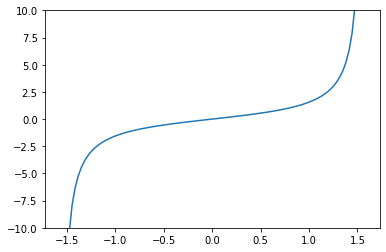

In [6]:
x0 = -np.pi*0.5
x1 = np.pi*0.5
xvals1 = np.linspace(x0,x1,n)
f1 = np.tan(xvals1)
plt.plot(xvals1,f1)
plt.ylim(-10,10)

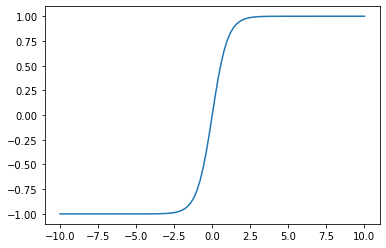

In [7]:
x0 = -10
x1 = 10
xvals2 = np.linspace(x0,x1,n)
f2 = np.tanh(xvals2)
plt.plot(xvals2, f2)

### Compute the roots, plot the convergences


 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-06
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  1.0                   -0.1                  1.5574077246549023  
    1  0.9                   -0.1                  1.2601582175503392  
    2  0.8                   -0.1                  1.0296385570503641  
    3  0.7000000000000001    -0.1                  0.8422883804630795  
    4  0.6000000000000001    -0.1                  0.6841368083416924  
    5  0.5000000000000001    -0.1                  0.5463024898437907  
    6  0.40000000000000013   -0.1                  0.42279321873816195 
    7  0.30000000000000016   -0.1                  0.3093362496096234  
    8  0.20000000000000015   -0.1                  0.20271003550867264 
    9  0.10000000000000014   -0.1                  0.10033467208545069 
   10  1.3877787807814457e-16  -0.1                  1.387

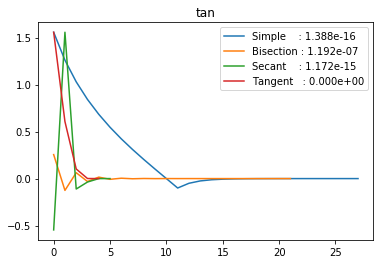

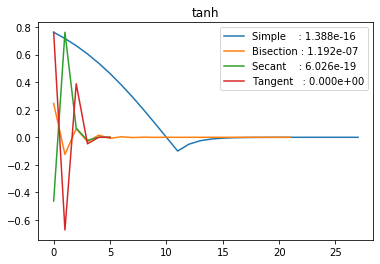

In [8]:
for i,name,func,deriv in zip( 
    range(2),
    ['tan', 'tanh'],
    [lambda x : np.tan(x), lambda x : np.tanh(x)], 
    [lambda x : 1./(np.cos(x))**2, lambda x : 1-np.tanh(x)**2 ]  ):

    fig = plt.figure(i)
    xroot_simple, iters_simple = root_simple( func, 1.0, -0.1, root_debug=True)
    iternum_simple = np.arange(len(iters_simple))

    xroot_bisection, iters_bisection = root_bisection( func, -0.5, 1.0, root_debug=True)
    iternum_bisection = np.arange(len(iters_bisection))

    xroot_secant, iters_secant = root_secant( func, -0.5, 1.0, root_debug=True)
    iternum_secant = np.arange(len(iters_secant))
    
    xroot_tangent, iters_tangent = root_tangent( func, deriv, 1.0, root_debug=True)
    iternum_tangent = np.arange(len(iters_tangent))
    
    
    plt.plot(iternum_simple,iters_simple[:,1],       label='Simple    : %6.3e' % (np.abs(xroot_simple)))
    plt.plot(iternum_bisection,iters_bisection[:,1], label='Bisection : %6.3e' % (np.abs(xroot_bisection)))
    plt.plot(iternum_secant,iters_secant[:,1],       label='Secant    : %6.3e' % (np.abs(xroot_secant)))
    plt.plot(iternum_tangent,iters_tangent[:,1],     label='Tangent   : %6.3e' % (np.abs(xroot_tangent)))
    plt.title(name)
    plt.legend()